# Crop Yield Dataset using Boosting

Purpose: Developing boosting techniques to model crop yield regression.

Author: Jordan A. Caraballo-Vega

Version: 2024.04.09

## 1. Import the necessary variables

We are going to read and load the data into a dataframe.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import xgboost
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

## 2. Load the dataset

We are going to read and load the data into a dataframe.

In [3]:
crop_df = pd.read_excel('drive/MyDrive/Terminal34/crop yield data sheet.xlsx')
crop_df

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0
...,...,...,...,...,...,...,...
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Perform EDA

In [4]:
crop_df.describe()

,Rain Fall (mm),Fertilizer,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,849.797980,67.808081,70.737374,21.131313,18.060606,9.050505
std,400.042676,10.028202,6.677079,1.951695,1.817254,1.965902
min,400.000000,50.000000,59.000000,18.000000,15.000000,5.500000
25%,450.000000,60.000000,65.000000,19.500000,16.000000,7.000000
50%,1150.000000,70.000000,71.000000,21.000000,19.000000,9.000000
75%,1237.500000,77.000000,77.000000,23.000000,19.000000,11.000000
max,1300.000000,80.000000,80.000000,25.000000,22.000000,12.000000


In [5]:
crop_df[crop_df.isna().any(axis=1) == True]

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,:,NaN,NaN,NaN,NaN


In [6]:
crop_df_clean = crop_df.dropna()
crop_df_clean

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0
...,...,...,...,...,...,...,...
94,1250.0,77.0,28,78.0,23.0,20.0,9.0
95,425.0,60.0,39,65.0,19.0,17.0,6.5
96,1220.0,79.0,28,77.0,23.0,21.0,10.5
97,480.0,65.0,36,68.0,21.0,16.0,7.0


<Axes: xlabel='Rain Fall (mm)', ylabel='Count'>

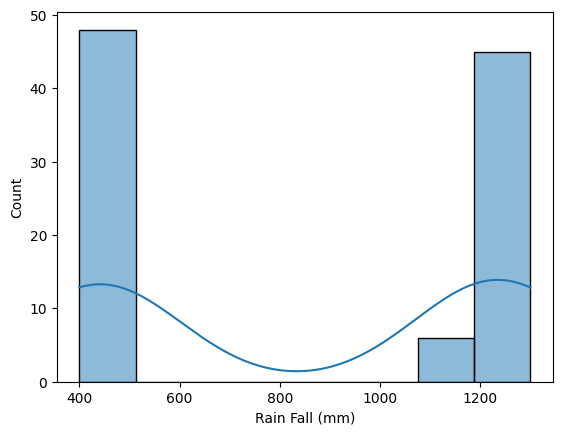

In [7]:
sns.histplot(x="Rain Fall (mm)", data=crop_df_clean, kde=True)

<Axes: xlabel='Fertilizer', ylabel='Count'>

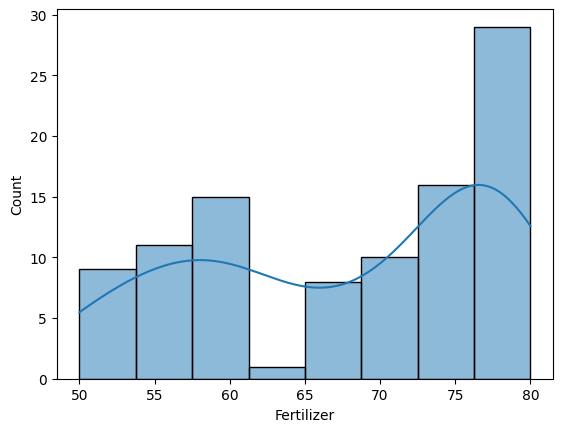

In [8]:
sns.histplot(x="Fertilizer", data=crop_df_clean, kde=True)

In [9]:
crop_df_clean.columns

Index(['Rain Fall (mm)', 'Fertilizer', 'Temperatue', 'Nitrogen (N)',
       'Phosphorus (P)', 'Potassium (K)', 'Yeild (Q/acre)'],
      dtype='object')

<Axes: xlabel='Nitrogen (N)', ylabel='Count'>

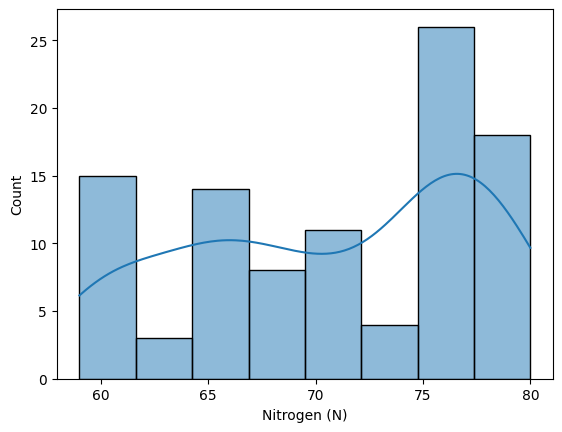

In [10]:
sns.histplot(x="Nitrogen (N)", data=crop_df_clean, kde=True)

<Axes: xlabel='Potassium (K)', ylabel='Count'>

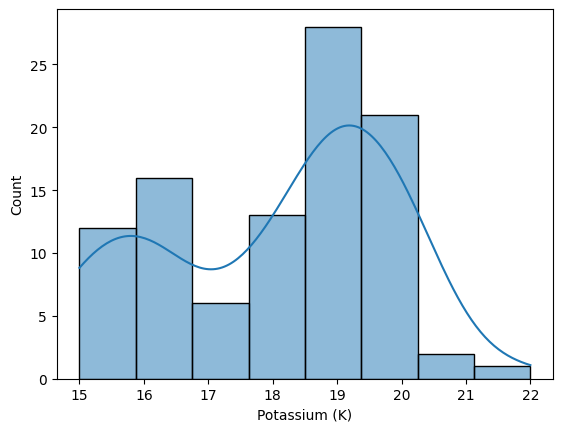

In [11]:
sns.histplot(x="Potassium (K)", data=crop_df_clean, kde=True)

<Axes: xlabel='Yeild (Q/acre)', ylabel='Count'>

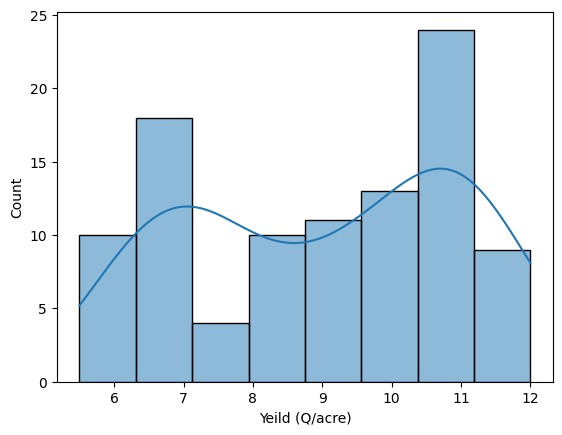

In [12]:
sns.histplot(x="Yeild (Q/acre)", data=crop_df_clean, kde=True)

<Axes: xlabel='Phosphorus (P)', ylabel='Count'>

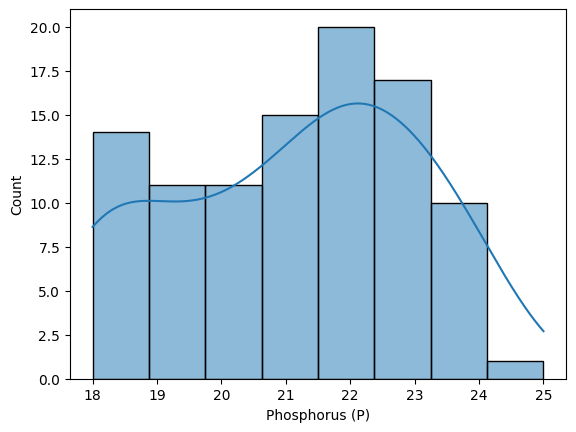

In [13]:
sns.histplot(x="Phosphorus (P)", data=crop_df_clean, kde=True)

<Axes: xlabel='Rain Fall (mm)', ylabel='Yeild (Q/acre)'>

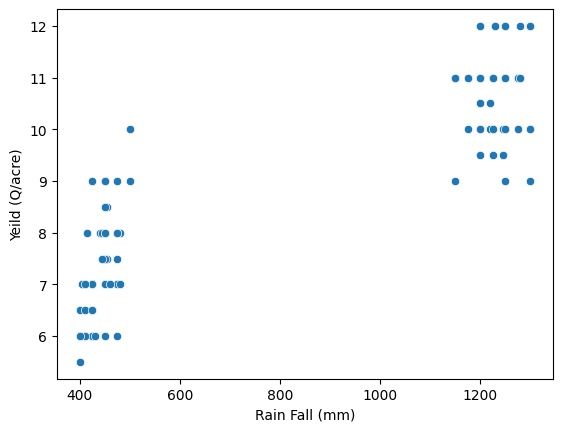

In [14]:
sns.scatterplot(x="Rain Fall (mm)", y="Yeild (Q/acre)", data=crop_df_clean)

<Axes: xlabel='Temperatue', ylabel='Count'>

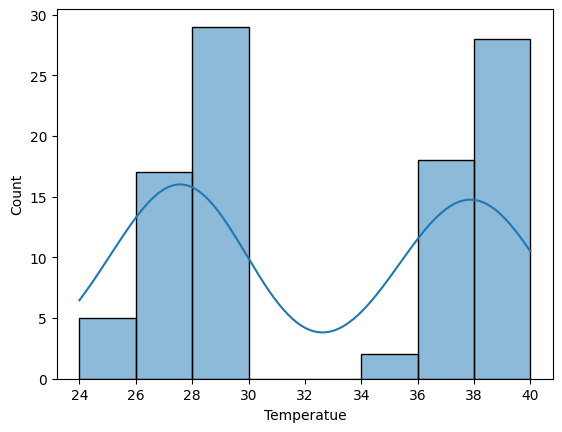

In [15]:
sns.histplot(x="Temperatue", data=crop_df_clean, kde=True)

In [16]:
crop_df['Temperatue'].unique()

array([28, 36, 29, 35, 27, 34, 37, 39, 26, 38, 24, 25, 40, nan, ':'],
      dtype=object)

In [17]:
crop_df_clean['Temperatue'].unique()

array([28, 36, 29, 35, 27, 34, 37, 39, 26, 38, 24, 25, 40], dtype=object)

In [18]:
crop_df[~crop_df.applymap(np.isreal).all(1)]

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
108,NaN,NaN,:,NaN,NaN,NaN,NaN


In [19]:
crop_df_clean[~crop_df_clean.applymap(np.isreal).all(1)]

,Rain Fall (mm),Fertilizer,Temperatue,Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)


## 4. Perform Feature Engineering

In [20]:
crop_df_clean = crop_df_clean.rename(
    columns={"Temperatue": "Temperature",
             "Yeild (Q/acre)": "Yield (Q/acre)"})
crop_df_clean.head()

,Rain Fall (mm),Fertilizer,Temperature,Nitrogen (N),Phosphorus (P),Potassium (K),Yield (Q/acre)
0,1230.0,80.0,28,80.0,24.0,20.0,12.0
1,480.0,60.0,36,70.0,20.0,18.0,8.0
2,1250.0,75.0,29,78.0,22.0,19.0,11.0
3,450.0,65.0,35,70.0,19.0,18.0,9.0
4,1200.0,80.0,27,79.0,22.0,19.0,11.0


In [21]:
X = crop_df_clean.drop(["Yield (Q/acre)"], axis=1)
y = crop_df_clean["Yield (Q/acre)"]

## 5. Split the Dataset

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.20, random_state = 42)

In [23]:
X_train.shape, X_test.shape

((79, 6), (20, 6))

## 6-7. Initialize and train Simple Regression Model

In [24]:
rfr = LinearRegression()

In [25]:
# Parameters for grid search
para = {
    "fit_intercept": [True, False]
}

# Grid search object
grid = GridSearchCV(rfr, para, cv=5, n_jobs=-1, verbose=1)

# Fitting the grid search object
grid.fit(X_train, y_train)

# Best parameters
print(grid.best_params_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'fit_intercept': True}


In [26]:
# Model with best parameters
rfr = LinearRegression(fit_intercept=True)

# Fitting the model
rfr.fit(X_train, y_train)

# Training score
print(rfr.score(X_train, y_train))

# Prediction
r_pred = rfr.predict(X_test)

0.873942670823873


In [27]:
def predict(model, X, y):

  # evaluate model
  print("Starting to predict")
  y_pred = model.predict(X)

  # get metrics
  print("Starting to evaluate")
  mse = mean_squared_error(y, y_pred)
  mae = mean_absolute_error(y, y_pred)
  rmse = np.sqrt(mse)
  print(f"MAE: {mae:.2f}")
  print(f"MSE: {mse:.2f}")
  print(f"RMSE: {rmse:.2f}")

  # plot scatter
  print("Starting to plot")
  plt.scatter(y, y_pred)
  plt.xlabel('y_test')
  plt.ylabel('y_pred')
  plt.show()
  return y_pred

Starting to predict
Starting to evaluate
MAE: 0.51
MSE: 0.44
RMSE: 0.66
Starting to plot


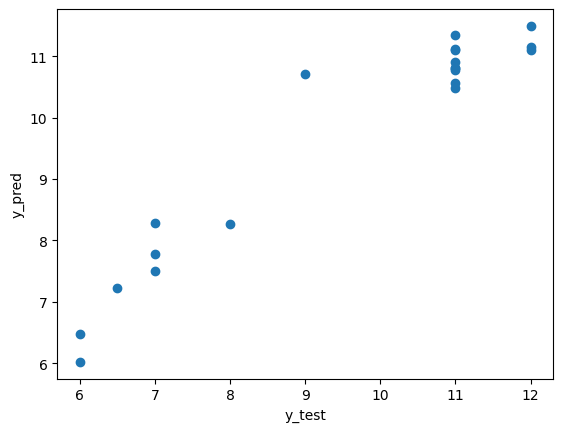

In [28]:
lr_predictions = predict(rfr, X_test, y_test)

## 8-9. Training and Predicting with Random Forest Model

In [29]:
rfr = RandomForestRegressor()

In [43]:
# Parameters for grid search
para = {
    "n_estimators": [100, 200, 300, 400, 1000],
    "max_depth": [2, 4],#, 6, 8],
    "min_samples_split": [2],#, 4, 6, 8],
    "min_samples_leaf": [2],#, 4, 6, 8],
    "random_state": [0],#, 42]
}

# Grid search object
grid = GridSearchCV(rfr, para, cv=5, n_jobs=-1, verbose=1)

# Fitting the grid search object
grid.fit(X_train, y_train)

# Best parameters
print(grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300, 'random_state': 0}


In [39]:
# Model with best parameters
rfr = RandomForestRegressor(**grid.best_params_)

# Fitting the model
rfr.fit(X_train, y_train)

# Training score
print(rfr.score(X_train, y_train))

0.8808163119597808


Starting to predict
Starting to evaluate
MAE: 0.62
MSE: 0.49
RMSE: 0.70
Starting to plot


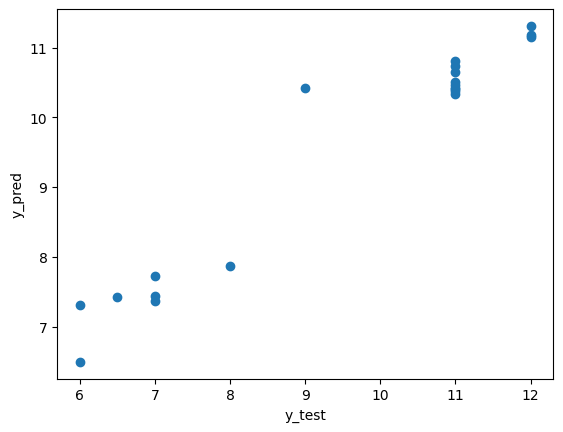

In [40]:
rf_predictions = predict(rfr, X_test, y_test)

<ipython-input-46-9e523eec6919>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, ax = ax[0]).set_title('Linear Regressor')
<ipython-input-46-9e523eec6919>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lr_predictions, ax = ax[0])
<ipython-input-46-9e523eec6919>:8: UserWarning: 

`distp

<Axes: title={'center': 'Random Forest Regressor'}, xlabel='Yield (Q/acre)', ylabel='Density'>

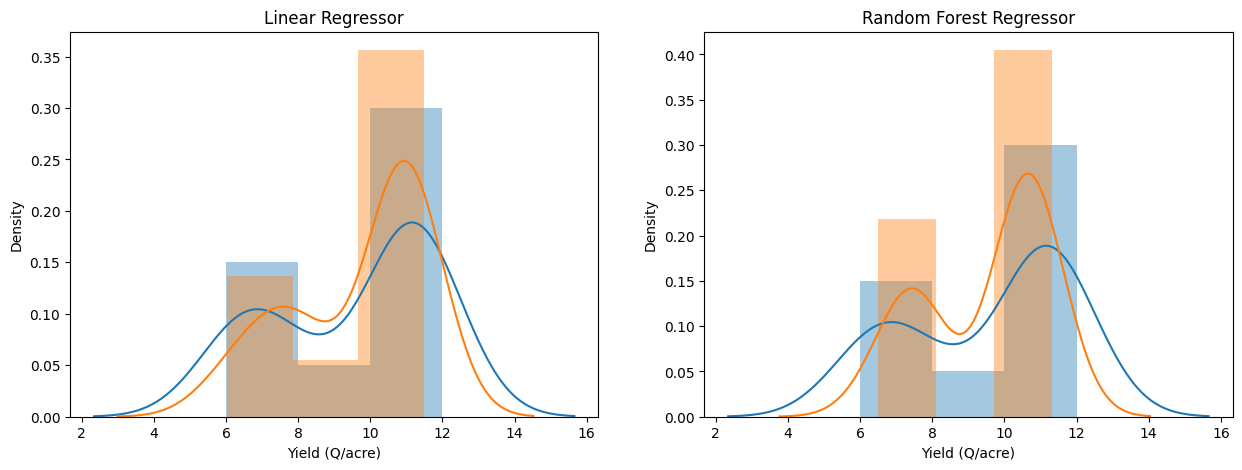

In [46]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))

#plotting the actual vs predicted values for decision tree regressor
sns.distplot(y_test, ax = ax[0]).set_title('Linear Regressor')
sns.distplot(lr_predictions, ax = ax[0])

#plotting the actual vs predicted values for random forest regressor
sns.distplot(y_test, ax = ax[1]).set_title('Random Forest Regressor')
sns.distplot(rf_predictions, ax = ax[1])

## 10-11. XGBoost training and inference

In [51]:
rfr = xgboost.XGBRegressor()

In [55]:
# Parameters for grid search
para = {
    "n_estimators": [100, 200, 300, 400, 1000],
    "max_depth": [2, 4],#, 6, 8],
    "random_state": [0],#, 42]
}

# Grid search object
grid = GridSearchCV(rfr, para, cv=5, n_jobs=-1, verbose=1)

# Fitting the grid search object
grid.fit(X_train.astype('float'), y_train.astype('float'))

# Best parameters
print(grid.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'max_depth': 2, 'n_estimators': 100, 'random_state': 0}


In [56]:
# Model with best parameters
rfr = xgboost.XGBRegressor(**grid.best_params_)

# Fitting the model
rfr.fit(X_train.astype('float'), y_train.astype('float'))

# Training score
print(rfr.score(X_train.astype('float'), y_train.astype('float')))

0.985277595744879


Starting to predict
Starting to evaluate
MAE: 0.59
MSE: 0.50
RMSE: 0.71
Starting to plot


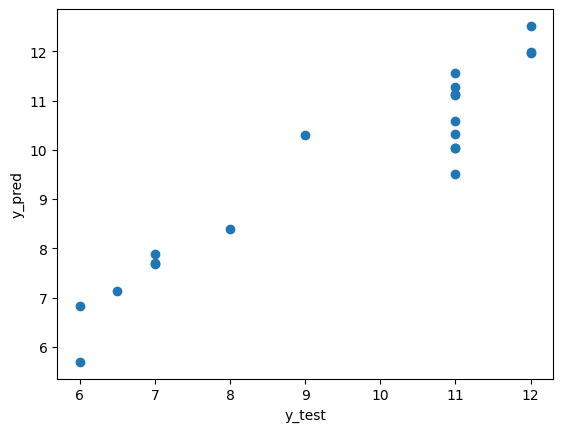

In [58]:
rf_predictions = predict(
    rfr, X_test.astype('float'), y_test.astype('float'))

In [64]:
rf_predictions_rounded = np.rint(rf_predictions)

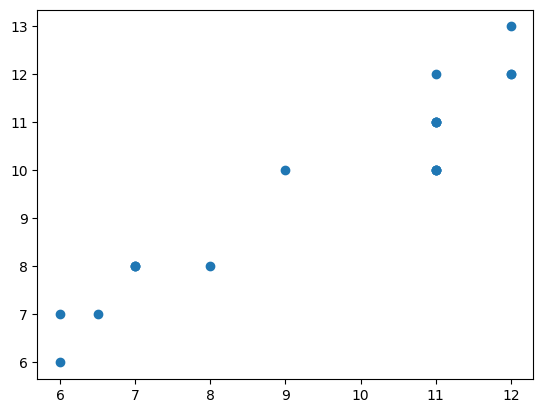

In [65]:
plt.scatter(y_test, rf_predictions_rounded)

In [67]:
rfr.feature_importances_

array([0.3150724 , 0.02712986, 0.40689784, 0.0211463 , 0.06855944,
       0.16119419], dtype=float32)